In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

Загружаем наши дата сеты  
SNP - Это индекс S&P 500  
BTC - Биткоин  
Stock - Это ETF VT акции на весь мир  
BND - Это мировые бонды (тикер iglo)  

In [3]:
snp = pd.read_csv("date.csv")
snp = snp.loc[:, ['date','S&P 500']]
snp["date"] = pd.to_datetime(snp["date"])
snp = snp.set_index("date")
snp.head()

,S&P 500
date,
2014-10-01,194.35
2014-10-02,194.38
2014-10-03,196.52
2014-10-06,196.29
2014-10-07,193.26


In [4]:
with open("btc_raw.txt", "rb") as file:
    btc = pd.read_json(file)
btc.columns = ["date","btc"]
btc["date"] = pd.to_datetime(btc["date"])
btc = btc.set_index("date")


def html_read(etf):
    df = pd.read_html(etf+"_raw.txt")[0]
    df = df.loc[:,["Date","Price"]]
    df.columns = ["date", etf]
    df["date"] = pd.to_datetime(df["date"])
    df = df.set_index("date")
    
    return df

stock = html_read("vt")
bnd = html_read("iglo")

Соеденяем полученые нами таблицы в одну с помощью concat

In [5]:
combined_df = pd.concat([btc,stock,bnd,snp], axis=1)

columns = ["btc","stock","bnd","snp"]
combined_df.columns = columns

Удаляем отсутвующие даты. Т.к биткоин торгуется 365 дней в год, а остальные 252, то появляются Nan


In [6]:
combined_df = combined_df.dropna()
combined_df

,btc,stock,bnd,snp
date,,,,
2014-10-01,381.3324,59.48,108.69,194.35
2014-10-02,371.9859,59.30,109.00,194.38
2014-10-03,356.5566,59.73,108.22,196.52
2014-10-06,328.4594,59.79,108.58,196.29
2014-10-07,334.0911,58.95,109.22,193.26
...,...,...,...,...
2020-09-04,10292.5983,82.21,118.31,342.57
2020-09-08,10316.5833,80.31,118.42,333.21
2020-09-09,10032.5000,81.78,118.24,339.79


С помощью pct_change находим процентную разницу между текущим значением и прошлым, удаляем NAN

In [7]:
daily_returns=combined_df.pct_change().dropna()
daily_returns.head()

,btc,stock,bnd,snp
date,,,,
2014-10-02,-0.024510,-0.003026,0.002852,0.000154
2014-10-03,-0.041478,0.007251,-0.007156,0.011009
2014-10-06,-0.078802,0.001005,0.003327,-0.001170
2014-10-07,0.017146,-0.014049,0.005894,-0.015436
2014-10-08,0.055966,0.015606,0.001007,0.017489


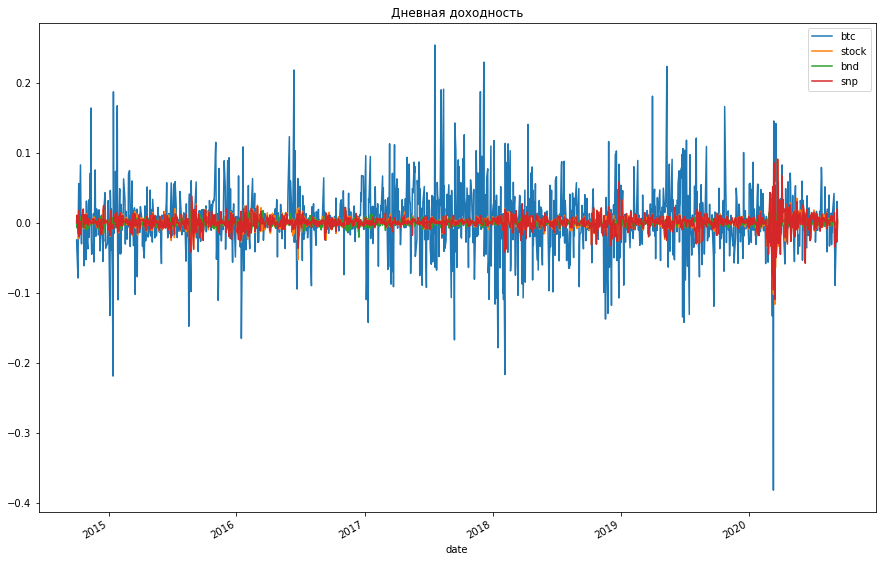

In [8]:
#Риусем дневную доходность
daily_returns.plot(title="Дневная доходность", figsize=(15,10));

Получил достаточно ожидаемый результат. Биткоин показывает себя наиболее волатильным, так например четко видно падаение за день на 40%


,btc,stock,bnd,snp
date,,,,
2014-10-02,0.975490,0.996974,1.002852,1.000154
2014-10-03,0.958522,1.007251,0.992844,1.011009
2014-10-04,0.912876,1.000000,1.000000,1.000000
2014-10-05,0.982023,1.000000,1.000000,1.000000
2014-10-06,1.027590,1.001005,1.003327,0.998830
...,...,...,...,...
2020-09-07,1.005310,1.000000,0.996788,1.000000
2020-09-08,1.014999,0.976888,1.004155,0.972677
2020-09-09,0.972463,1.018304,0.998480,1.019747


In [9]:
#cumprod  для комулятивной суммы
cummulative_returns=(1+daily_returns).cumprod()
cummulative_returns.tail()

,btc,stock,bnd,snp
date,,,,
2020-09-04,26.991146,1.382145,1.088509,1.762645
2020-09-08,27.054043,1.350202,1.089521,1.714484
2020-09-09,26.309068,1.374916,1.087865,1.748341
2020-09-10,27.118115,1.355582,1.085472,1.717983
2020-09-11,27.221761,1.360962,1.089337,1.718858


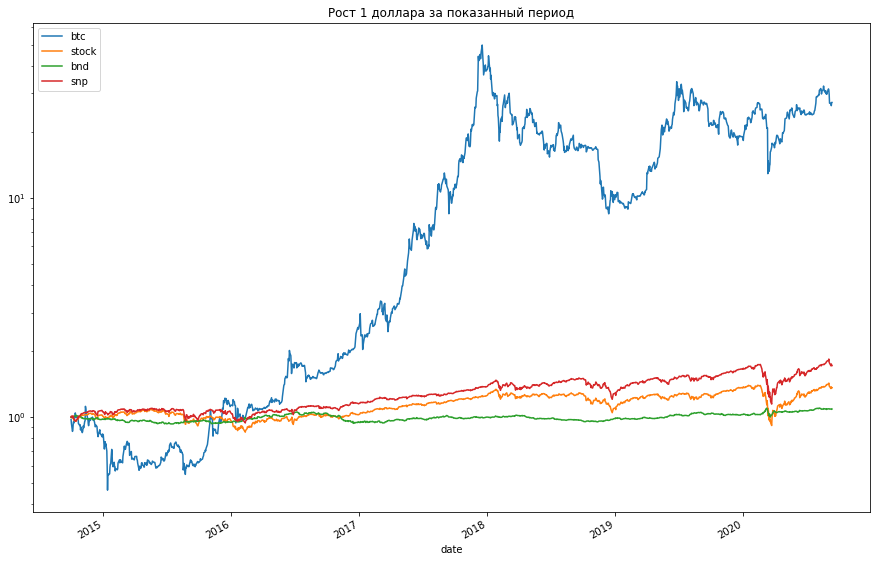

In [11]:
cummulative_returns.plot(figsize=(15,10), title= "Рост 1 доллара за показанный период",  logy=True);

Биткоин дал 2700%, S&P500 71%, Бонды 9%, Мировые акции 31%

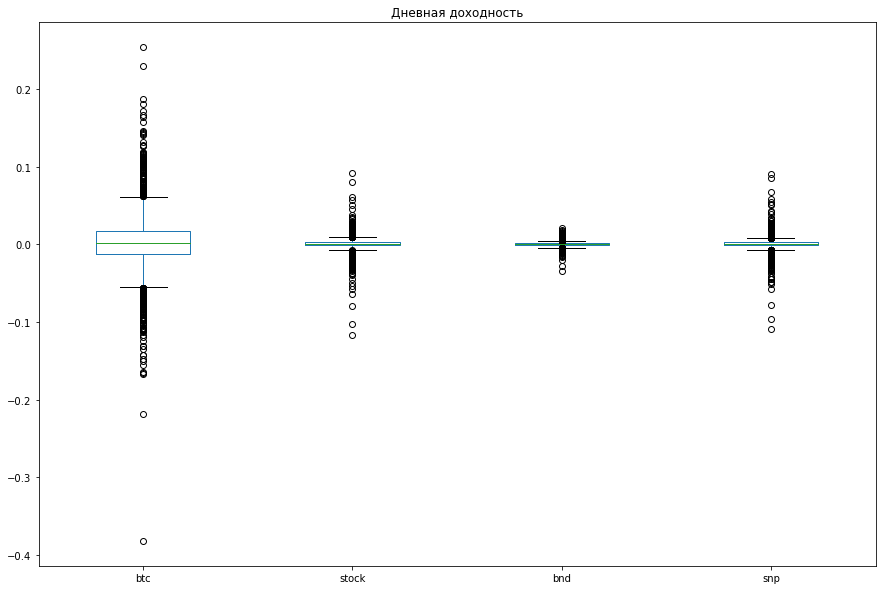

In [111]:
daily_returns.plot(kind='box', figsize=(15,10), title="Дневная доходность");

С помощью боксплота можно посмотреть наскольно волатильный продукт. Связав этот график с прошлым, можно подтвердить правило - чем больше риск, тем больше доходность

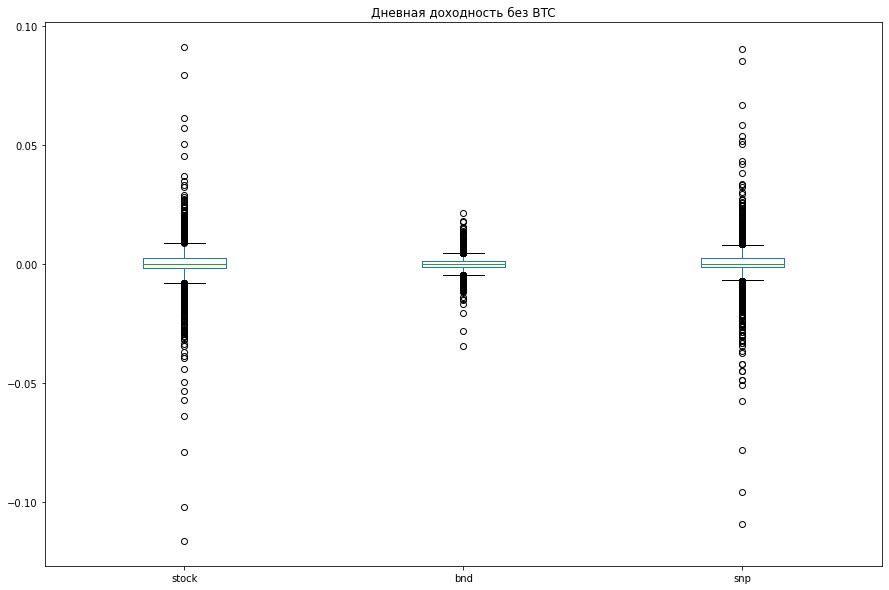

In [110]:

daily_returns_without_btc=daily_returns.drop(columns="btc")
daily_returns_without_btc.plot(kind='box', figsize=(15,10), title="Дневная доходность без BTC");

##### Уберем биткоин чтобы посмотреть на остальное более точно. Оказалось что snp 500 одинаков по волатильности с VT, но имеет доходность в два раза больше
  
### Расмотрим риски болеее детально 

In [98]:
#Стандартное отклонение
daily_returns.std().sort_values()


bnd      0.003299
stock    0.009452
snp      0.009590
btc      0.038978
dtype: float64

In [14]:
#Посмотрим теперь на годовое ст. отклонение, для этого умножим на корень из 252 (торговые дни)
ann_standard_deviation=daily_returns.std()*np.sqrt(252)
ann_standard_deviation.sort_values()

bnd      0.063677
stock    0.182058
snp      0.184746
btc      0.728796
dtype: float64

In [15]:
#Среднегодовая доходность
ann_average_return=daily_returns.mean()*252
ann_average_return.sort_values()

bnd      0.016668
stock    0.069455
snp      0.109846
btc      0.834295
dtype: float64

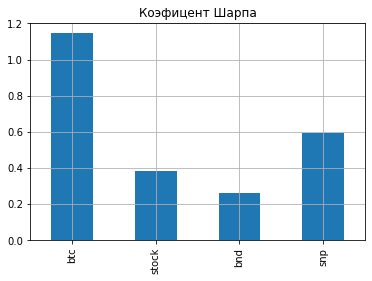

In [17]:
#Коэффицент шарпа
ann_sharpe = ann_average_return / ann_standard_deviation
ann_sharpe.plot.bar(title="Коэффицент Шарпа", grid=True);

Коэффицент шарпа показывает эффективность актива. Т.е насколько хорошо доходность актива компенсирует  риск

In [109]:
correlations=daily_returns.corr()
correlations

,btc,stock,bnd,snp
btc,1.000000,0.106644,0.032639,0.102863
stock,0.106644,1.000000,-0.036077,0.969528
bnd,0.032639,-0.036077,1.000000,-0.083209
snp,0.102863,0.969528,-0.083209,1.000000


# Итого
Во-первых подтвердил главное правило инвестора - чем выше доходность, тем больше риск. На примере биткоина хорошо видно, как может упасть цена за день (-40%), но при этом показатель себя гораздо лучше в другие дни. 
Бонды как и следовало показали себя достаточно консервативным инструментом с низкой доходность ~1% и низким риском
Если сравнивать VT и S&P 500 , то почти при одинаковом дневной,годовой волатильности, s&p 500 дал доход намного больше.

Если говорить о корреляции, то здесь результат тоже ожидаемый, STOCK и S&p 500 коррелируют, ибо имеет в портфеле похожие акции с похожей аллокацией. Фондовый рынок и биткоин коррелируют не сильно
